In [1]:
using Graphs
using Plots, ColorSchemes
using LinearAlgebra
using Statistics
include("../mpdbp.jl")
include("../exact/random_regular.jl")
import ProgressMeter; ProgressMeter.ijulia_behavior(:clear);

BP on a tetrahedron graph

In [2]:
q = q_glauber
T = 6
N = 4
J = ones(N,N) - diagm(ones(N))
h = zeros(N)
β = 1.0
ising = Ising(J, h, β)

p⁰ = map(1:N) do i
    r = 0.75
    [r, 1-r]
end
ϕ = [[[0.5,0.5] for t in 1:T] for i in 1:N];

In [3]:
ε = 1e-2
bp = mpdbp(ising, T, ϕ, p⁰, d=1)
cb = CB_BP(bp)
iterate!(bp, maxiter=50; ε, cb, tol=1e-2);

Running MPdBP: iter 9 	 Time: 0:02:25
  Δ:  0.004132866734373797

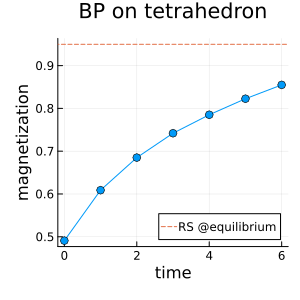

In [4]:
m_bp = cb.mag
pl = plot(0:T, mean(m_bp), xlabel="time", ylabel="magnetization", label="", m=:o, size=(300,300),
    xticks=0:2:T)
m_eq = rs_magnetization_fixedpoints(β, 1.0, 3)
hline!([m_eq[3]], ls=:dash, label="RS @equilibrium", legend=:bottomright, title="BP on tetrahedron")

## Use messages as starting point for RS

In [15]:
include("../ensemble.jl")

magnetization_rs_deg3 (generic function with 1 method)

In [23]:
A = deepcopy(bp.μ[1])
pᵢ⁰ = p⁰[1]
ϕᵢ = ϕ[1]
wᵢ = fill( GlauberFactor(ones(3), 0.0, β), T )
ε = 1e-3

0.001

In [24]:
Δs = zeros(0)
A, iters, Δs = iterate_rs_deg3(A, pᵢ⁰, wᵢ, ϕᵢ; ε, maxiter=100, tol=1e-3, Δs, verbose=true, showprogress=false)
println("### Computing magnetization...\n")
mag = magnetization_rs_deg3(A, pᵢ⁰, wᵢ, ϕᵢ; ε);

Converting B to C 100%|██████████████████████████████████| Time: 0:00:29
  t:  6/6


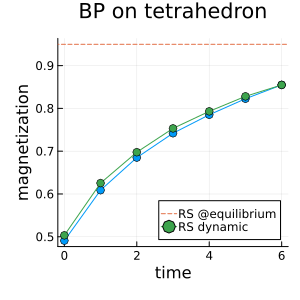

In [25]:
plot!(deepcopy(pl), 0:T, mag, label="RS dynamic", m=:o)